<a href="https://colab.research.google.com/github/Dewnosaur/front/blob/main/SF251_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 - Visualization and EDA

## DUE: Friday 28th February 23:59

- There are 25 questions in total. 5 points total.

**Note**: การบ้านนี้ยาก ควรเริ่มแต่เนิ่นๆ ไม่เข้าใจมีปัญหา ถามได้เสมอนะครับ

In this homework, we will explore two datasets to answer questions.

The first dataset is about vaccine. The homework will walk you through the process of answering questions about vaccine effectiveness.

The second dataset is about diamonds from the lecture. We continue to explore it to answer various questions about diamonds.

## Vaccine Data

- Our question is does vaccine help reduce/eliminate dieseases?
- We use the vaccine data from [Project Tycho](https://www.tycho.pitt.edu/) to answer this question.
- The data include weekly reported counts for seven diseases from 1928 to 2011, from all fifty USA states.
- Data can be found [here](https://github.com/yongsa-nut/TU_CN240_DataScience_671/blob/main/Data/us_contagious_diseases.csv).

In [1]:
!wget https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/us_contagious_diseases.csv

--2025-02-28 10:04:19--  https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/us_contagious_diseases.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 796062 (777K) [text/plain]
Saving to: ‘us_contagious_diseases.csv’

us_contagious_disea 100%[===================>] 777.40K  --.-KB/s    in 0.007s  

2025-02-28 10:04:19 (103 MB/s) - ‘us_contagious_diseases.csv’ saved [796062/796062]



In [2]:
import pandas as pd
from plotnine import *
vaccine = pd.read_csv('us_contagious_diseases.csv')
vaccine.head()

,Unnamed: 0,disease,state,year,weeks_reporting,count,population
0,1,Hepatitis A,Alabama,1966,50,321,3345787.0
1,2,Hepatitis A,Alabama,1967,49,291,3364130.0
2,3,Hepatitis A,Alabama,1968,52,314,3386068.0
3,4,Hepatitis A,Alabama,1969,49,380,3412450.0
4,5,Hepatitis A,Alabama,1970,51,413,3444165.0


In [3]:
vaccine.shape

(16065, 7)

### Q1a: How many diesease is in this dataset?

- Complete the code to display what diseases are in the dataset

In [7]:
diseases = vaccine['disease'].unique()
diseases.shape

(7,)

### Q1b: Creating a subset of the dataset

- We will be looking at `Measles` (โรคหัด) first.
- Create a new DataFrame with only 'Measles'
- Additionally, we will not include 'Alaska' and 'Hawaii' states in our analysis since they only became states in the late 1950s.


In [8]:
df_measles = vaccine[vaccine['disease'] == 'Measles']
df_measles = df_measles[(df_measles['state'] != 'Alaska') & (df_measles['state'] != 'Hawaii')]
# check your new df
print(df_measles['disease'].value_counts())
print(df_measles['state'].value_counts().reset_index().sort_values('state'))

disease
Measles    3675
Name: count, dtype: int64
                   state  count
0                Alabama     75
25               Arizona     75
27              Arkansas     75
28            California     75
29              Colorado     75
30           Connecticut     75
31              Delaware     75
32  District Of Columbia     75
33               Florida     75
34               Georgia     75
35                 Idaho     75
36              Illinois     75
37               Indiana     75
38                  Iowa     75
39                Kansas     75
40              Kentucky     75
41             Louisiana     75
42                 Maine     75
43              Maryland     75
44         Massachusetts     75
45              Michigan     75
46             Minnesota     75
47           Mississippi     75
26              Missouri     75
24               Montana     75
1               Nebraska     75
23                Nevada     75
2          New Hampshire     75
3             New Jers

### Q1c: Report Rate per year.

- In the dataset, we have a variable, `count`, representing the number of reported cases (in that state at that year).
- However, we cannot simply use `count` directly to show that vaccines help reduce the number of cases.
- There are two reasons for this dataset:
  1. `count` came from weekly reports but not every week were reported. We have a variable `weeks_reporting` which indicates how many weeks of the year data was reported.  
  2. the number of cases will depend on the number of population. Therefore, we will need to adjust for the population, using `population`.

- Therefore, what we want is the **rate of this disease** that takes into account of population and weeks report.
- To make the rate easier to interpret, we will do it per 10,000 population.
---
- ในชุดข้อมูล เรามีตัวแปร `count` ที่แสดงจำนวนผู้ป่วยที่รายงาน (ในรัฐนั้นๆ ในปีนั้นๆ)
- อย่างไรก็ตาม เราไม่สามารถใช้ `count` โดยตรงเพื่อแสดงว่าวัคซีนช่วยลดจำนวนผู้ป่วยได้
- มีสองเหตุผลสำหรับชุดข้อมูลนี้:
  1. `count` มาจากรายงานรายสัปดาห์ แต่ไม่ได้มีการรายงานทุกสัปดาห์ เรามีตัวแปร `weeks_reporting` ที่ระบุจำนวนสัปดาห์ที่มีการรายงานข้อมูลในปีนั้น
  2. จำนวนผู้ป่วยจะขึ้นอยู่กับจำนวนประชากร ดังนั้น เราจำเป็นต้องปรับค่าตามจำนวนประชากร โดยใช้ `population`

- ดังนั้น สิ่งที่เราต้องการคือ **อัตราการเกิดโรคนี้** ที่คำนึงถึงจำนวนประชากรและจำนวนสัปดาห์ที่รายงาน
- เพื่อให้อัตราเข้าใจง่ายขึ้น เราจะคำนวณต่อประชากร 10,000 คน

---

- The rate (`rate`) of cases per 10000 can be calculated as follows: $\frac{\text{count}*10000}{\text{population}}*\frac{52}{\text{weeks_report}}$
- Complete the code below to create a new column `rate`.

Your results should look like this:
```
	        rate
2346	34.143872
2347	11.989333
2348	15.705255
2349	35.498411
2350	1.271577
dtype: float64
```

In [10]:
df_measles.loc[:,'rate'] = df_measles['count']*10000/df_measles['population']*52/df_measles['weeks_reporting']
#we will fill NaN with 0. NaN occurs because of 0*inf (from divided by 0)
df_measles.loc[:,'rate'] = df_measles['rate'].fillna(0)
df_measles['rate'].head()

,rate
2346,34.143872
2347,11.989333
2348,15.705255
2349,35.498411
2350,1.271577


### Q1d-e: Trend Plot

- Now that we have `rate`, we can answer our question, does vaccine help?
- The vaccine for measles was introduced in USA in 1963.
- This means we want to see how the rate of measles changes over time, especially before and after the vaccine was introduced.
- Let's check one state first. Let look at California only.
- For this question, create a time series plot where x-axis is `year` and y-axis is `rate`. Use `geom_line` for this question.
  - Additionally, add a vertical blue line at 1963 to indicate when the vaccine was introduce. Here is the syntax, `geom_vline(xintercept = 1963, color='blue')` See the [documentation](https://plotnine.org/reference/geom_vline.html).
  - Update y-axis to `Cases per 10,000`

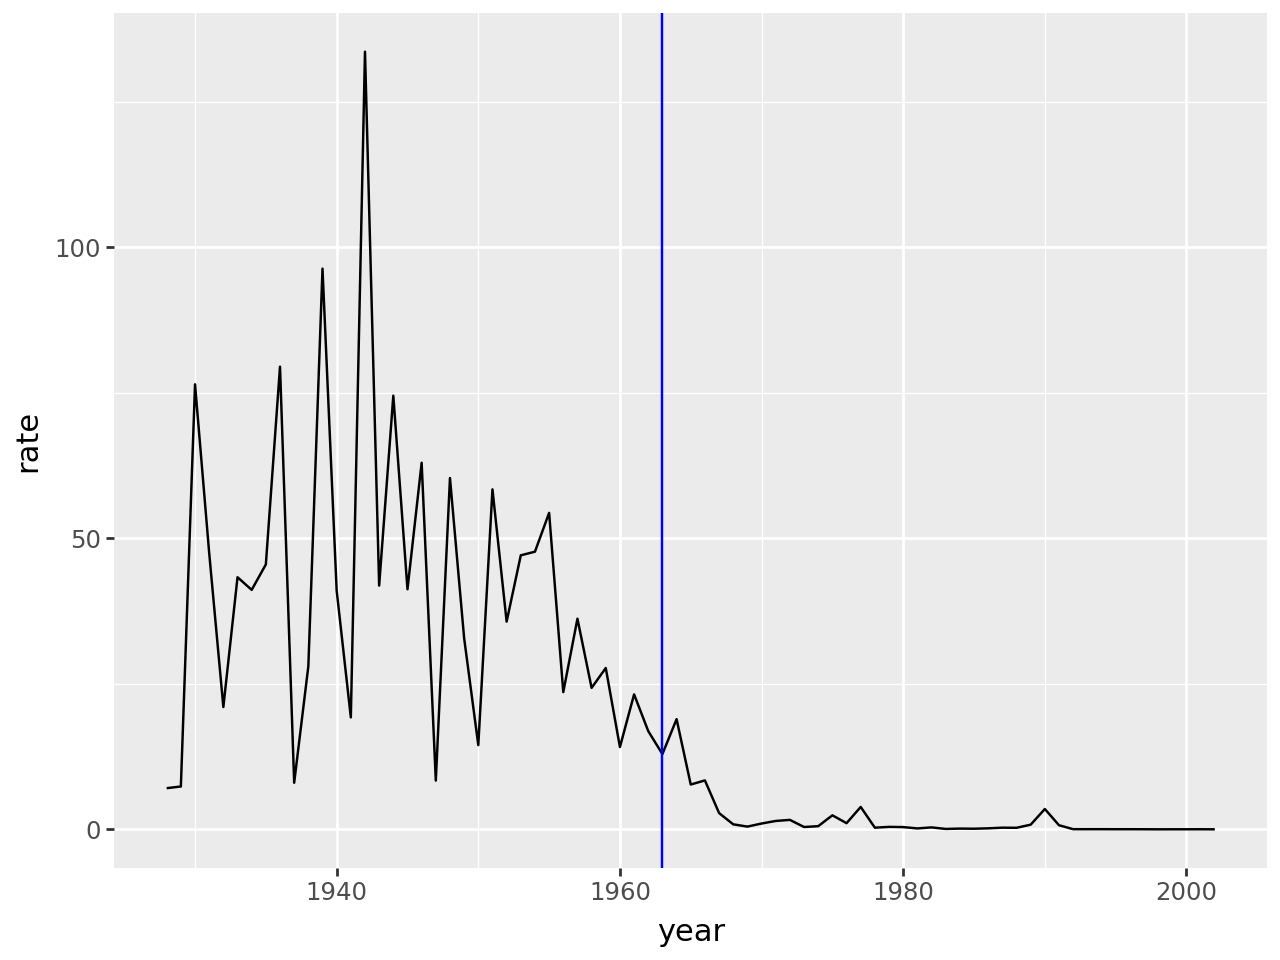

In [ ]:
# Check the plot below

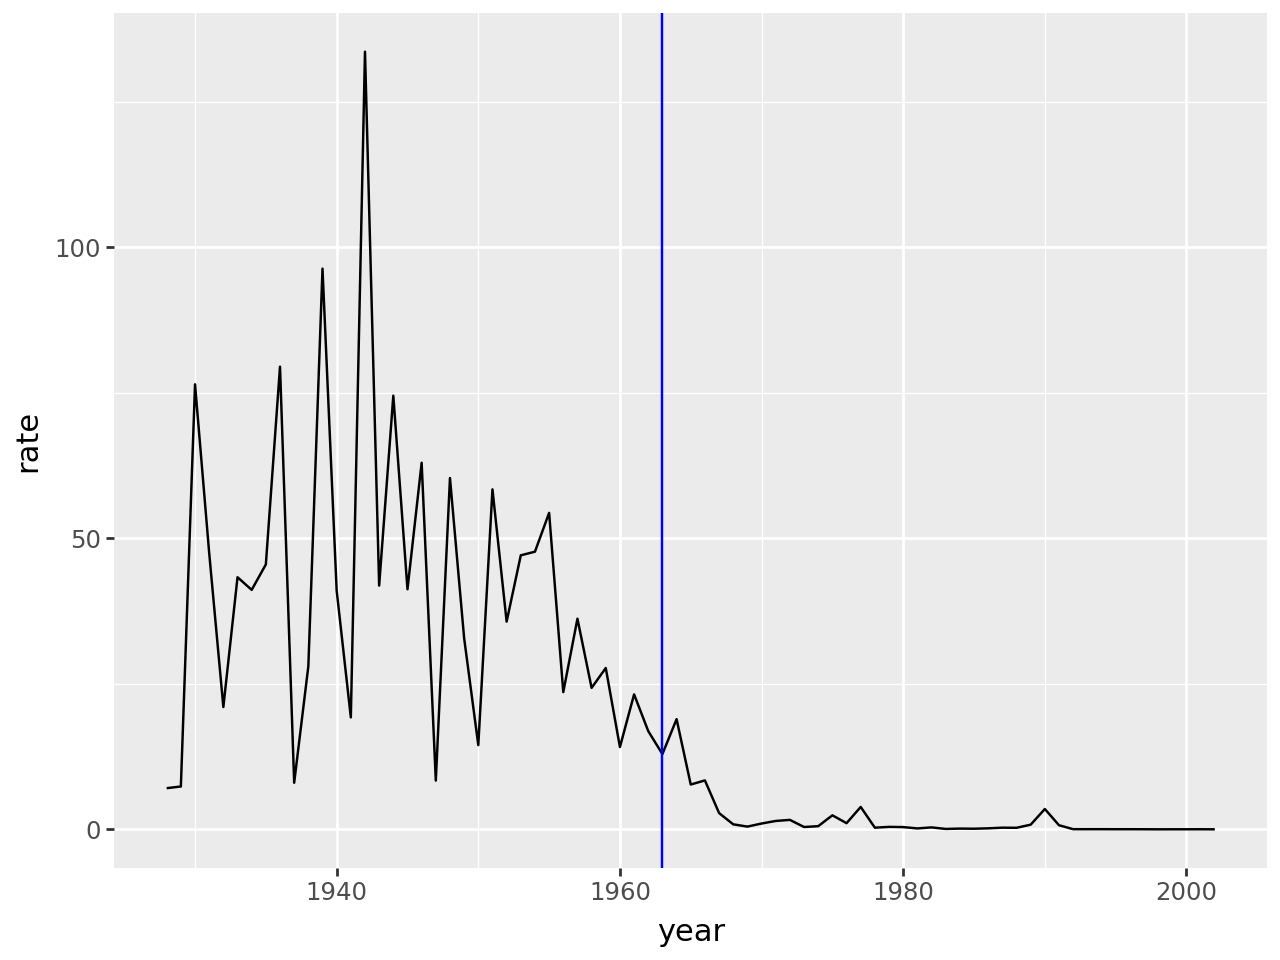

In [12]:
df_measles_CA = df_measles[df_measles['state'] == 'California']
g_measles_CA = ggplot(df_measles_CA, aes(x='year', y='rate')) + geom_line() + geom_vline(xintercept = 1963, color='blue')
g_measles_CA

<br>

---

## Heatmaps

### Q2a: Heatmaps
- How should we show all states in one plot?
- We have three variables: `year`, `state`, and `rate`.
- `year` is a numerical variable and we want it to be on the x-axis for a time series plot. `state` is a categorical variable and `rate` is a numerical variable.
- One type of plot that is suitable for this is heatmap where `state` is on y-axis and `rate` is color/heat.
- To plot a heatmap, we can use `geom_tile()` ([Documentation](https://plotnine.org/reference/geom_tile.html))
- Additionally, add `geom_vline` to indicate when the vaccine was introduced (1963).

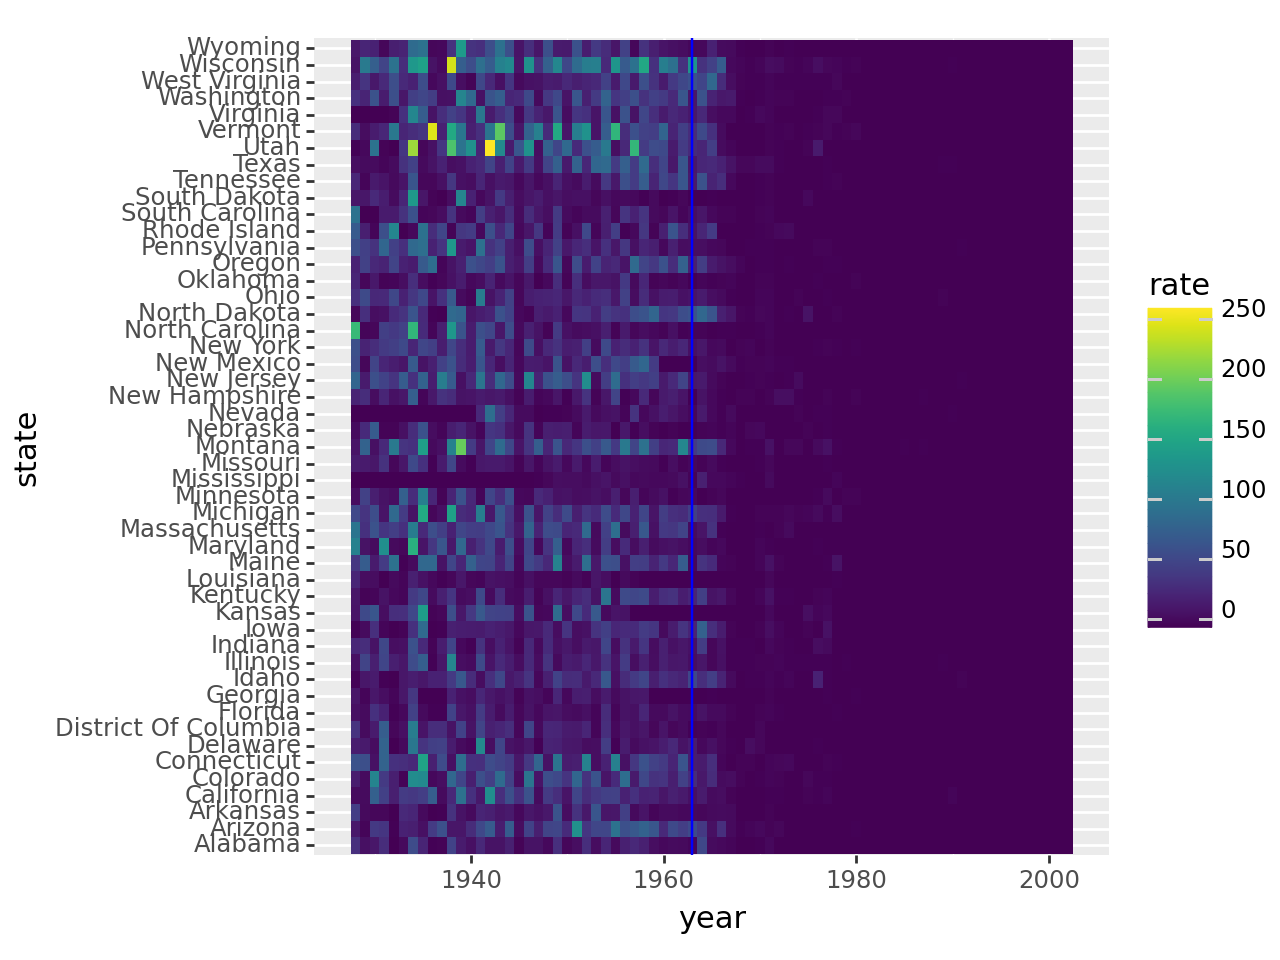

In [ ]:
# See the plot below

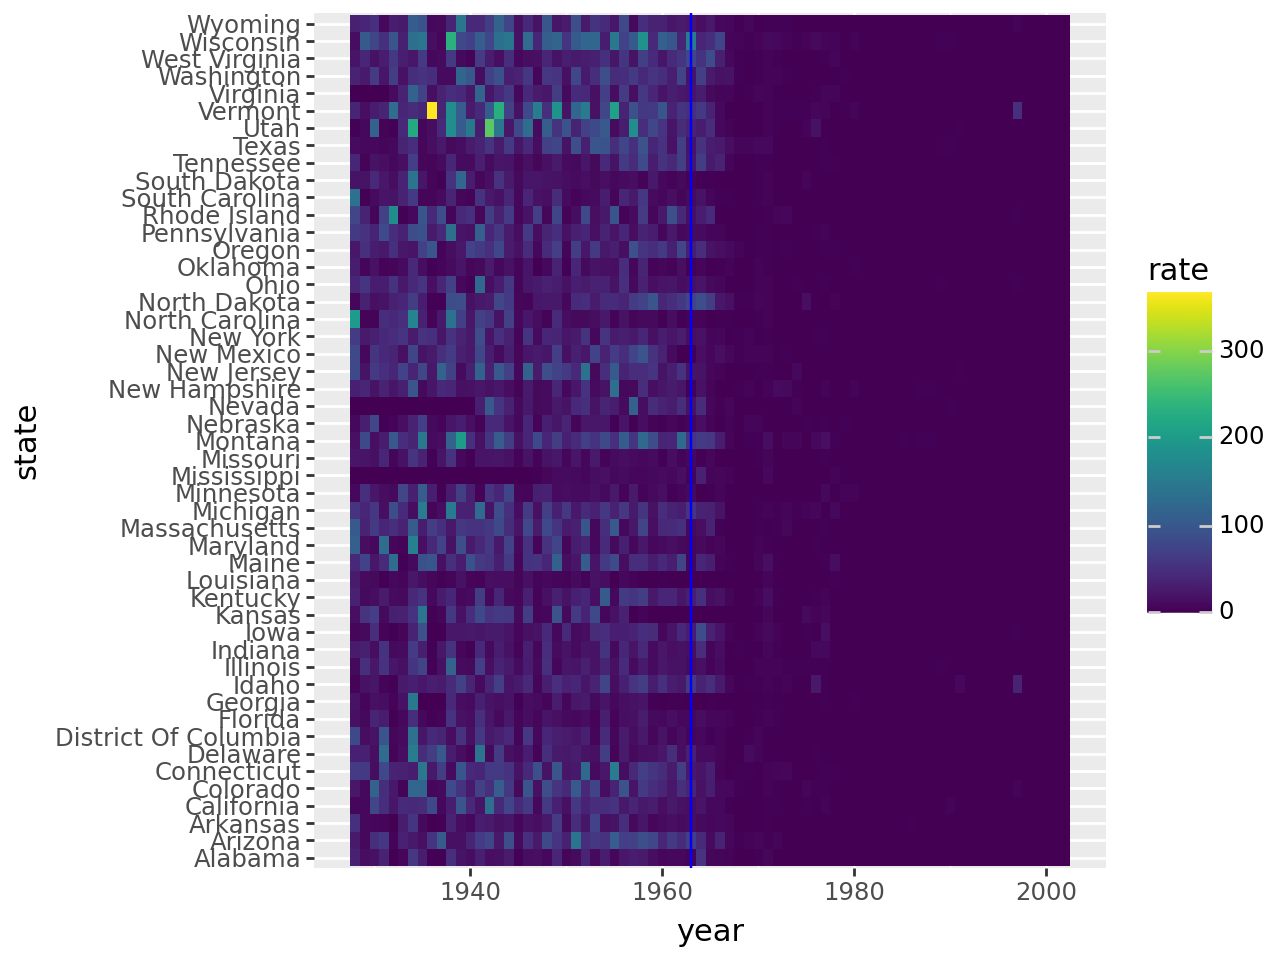

In [13]:
g_heatmap = ggplot(df_measles, aes(x='year', y='state', fill='rate')) + geom_tile() + geom_vline(xintercept = 1963, color='blue')
g_heatmap

### Q2b-c: Polishing Heatmap

The default heatmap looks quite bad. This question will walk you through several ways to improve the plot.


1.   We can change the border's color (`color` of `geom_tile`) from none to `gray` to make the year cleaner to read.
2. We will get rid off the extra space before and after the x-axis range. We can do that by using `scale_x_continuous(expand = [0,0])`. (See [documentation](https://plotnine.org/reference/scale_x_continuous.html))
3. We will also change the heatmap's color.
  - We want the zero rate to be `white` and the maximum rate to be `red`.
  - Additionally, we will transform the scale to square root of rate before evenly divide the specturm of color. This makes the color distribution emphasizes the high rate more (try it without this transform to see the different).  
  - To accomplish these, add `scale_fill_gradient(low='white', high='red', trans = 'sqrt')`.
  - See [documentation](https://plotnine.org/reference/scale_fill_gradient.html)
4. Increase the plot size to 8 x 6 inches.
5. Finally, add the title ('Measles') and remove the x and y axis labels (`theme(axis_title_x=element_blank(), axis_title_y=element_blank())`) since it's clear from the context what they are.



In [23]:
# See the plot below

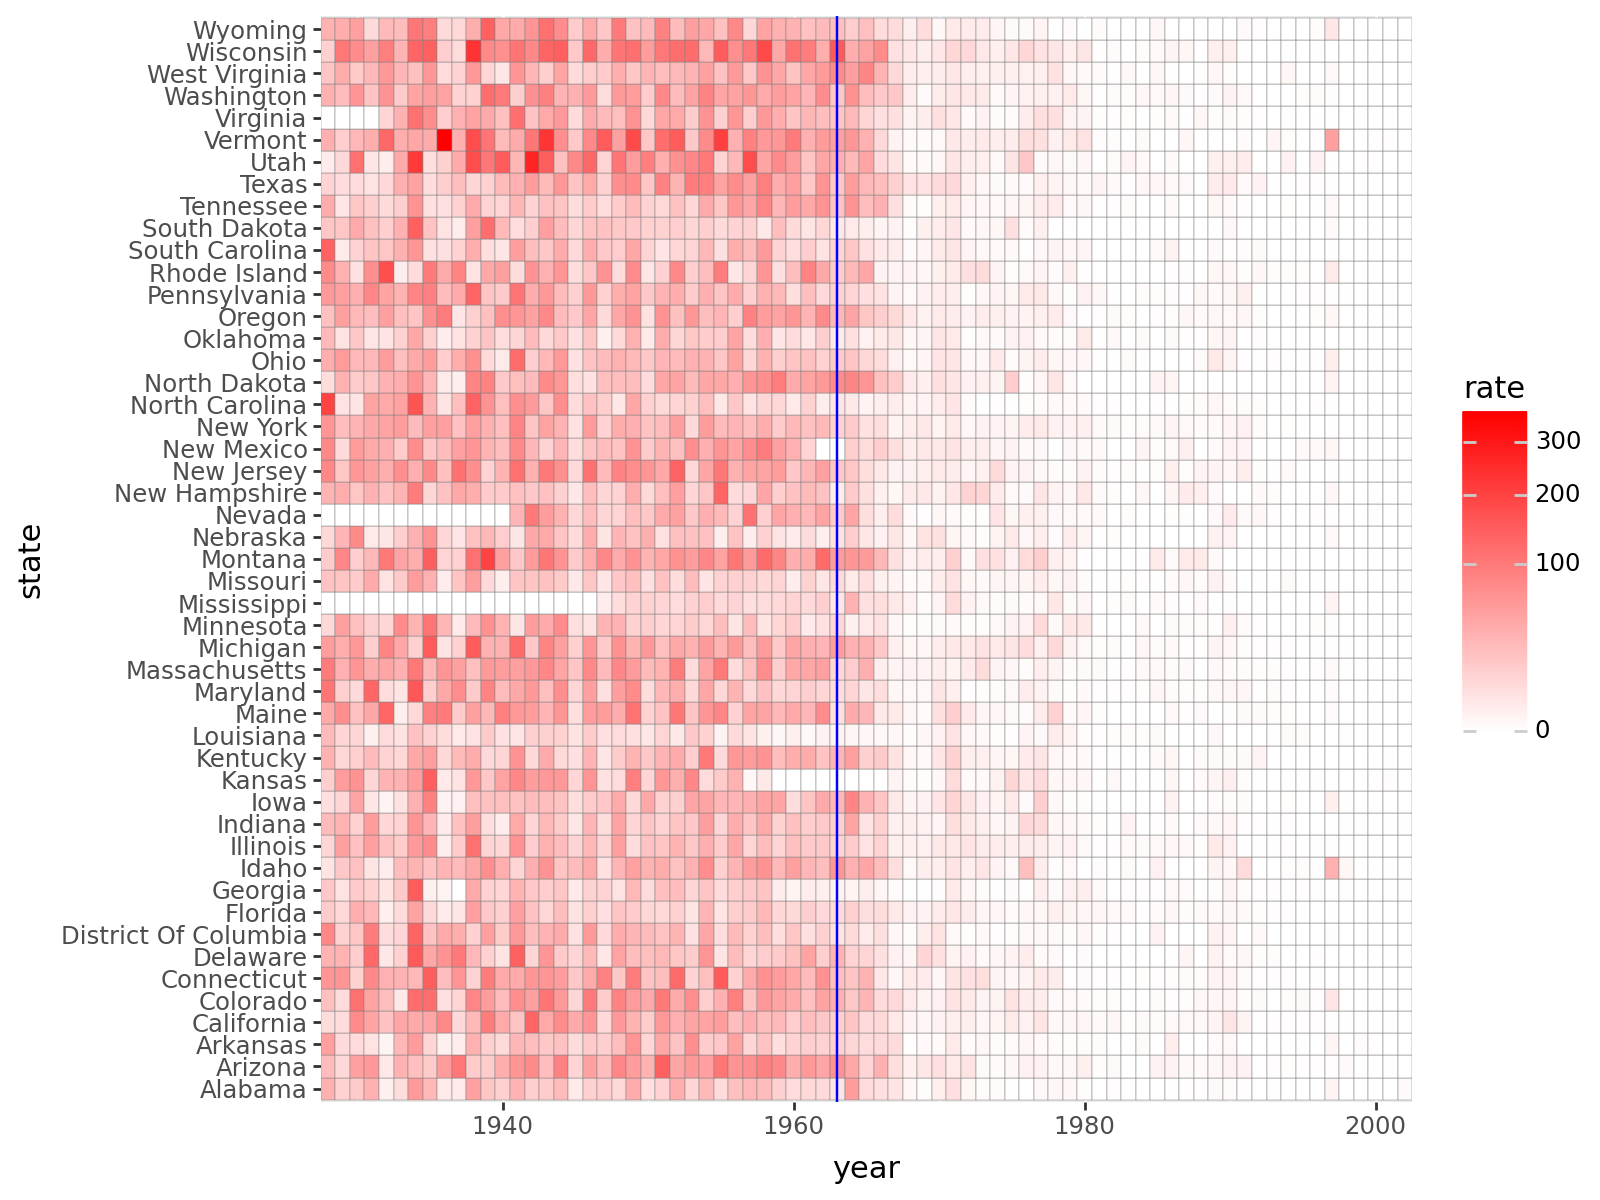

In [24]:
g_heatmap = ggplot(df_measles, aes(x='year', y='state', fill='rate')) + geom_tile(color='gray') + scale_x_continuous(expand = [0,0])+scale_fill_gradient(low='white', high='red',trans = 'sqrt')+geom_vline(xintercept = 1963, color='blue')+theme(figure_size=(8, 6))
g_heatmap

### Q2d: Checking the plot

- The above plot suggests that after the vaccines was introduced, the rate of measles across all states substaintially reduced and evetually got to zero. (Can we conclude from this plot that vaccine actually eliminate measles? Why or why not?)
- Take a look at the plot carefuly. Did you see a few states (Nevada, Mississippi, and Virginia) have several white cells early on?
- What happened there?
- To answer this question, let's check the data.
- Display the data of the three states (Nevada, Mississippi, and Virginia) before 1940.

---
- กราฟข้างต้นแสดงให้เห็นว่าหลังจากมีการนำวัคซีนมาใช้ อัตราการเกิดโรคหัดในทุกรัฐลดลงอย่างมากและในที่สุดก็ลดลงเป็นศูนย์ (เราสามารถสรุปจากกราฟนี้ได้หรือไม่ว่าวัคซีนกำจัดโรคหัดได้จริง? ทำไมจึงเป็นเช่นนั้นหรือไม่เป็นเช่นนั้น?)
- ลองดูกราฟอย่างละเอียด คุณเห็นหรือไม่ว่ามีบางรัฐ (เนวาดา มิสซิสซิปปี และเวอร์จิเนีย) มีเซลล์สีขาวหลายเซลล์ในช่วงแรก?
- เกิดอะไรขึ้นที่นั่น?
- เพื่อจะตอบคำถามนี้ เรามาตรวจสอบข้อมูลกัน
- แสดงข้อมูลของทั้งสามรัฐ (เนวาดา มิสซิสซิปปี และเวอร์จิเนีย) ก่อนปี 1940

In [25]:
df_measles_NMV = df_measles[(df_measles['state'].isin(['Nevada', 'Mississippi', 'Virginia'])) & (df_measles['year'] < 1940)]
df_measles_NMV

,Unnamed: 0,disease,state,year,weeks_reporting,count,population,rate
4146,4147,Measles,Mississippi,1928,1,0,1955120.0,0.000000
4147,4148,Measles,Mississippi,1929,0,0,1982792.0,0.000000
4148,4149,Measles,Mississippi,1930,0,0,2009821.0,0.000000
4149,4150,Measles,Mississippi,1931,0,0,2035551.0,0.000000
4150,4151,Measles,Mississippi,1932,0,0,2059750.0,0.000000
4151,4152,Measles,Mississippi,1933,0,0,2082292.0,0.000000
4152,4153,Measles,Mississippi,1934,0,0,2103057.0,0.000000
4153,4154,Measles,Mississippi,1935,0,0,2121923.0,0.000000
4154,4155,Measles,Mississippi,1936,0,0,2138773.0,0.000000
4155,4156,Measles,Mississippi,1937,1,0,2153492.0,0.000000


### Q2e: Updating Our DataFrame

- Did you notice that some of them (specifically those with white cells) have 0 `weeks_reporting`? (and so `count` is 0 and `rate` is also 0.) What does that mean?
- It means that we actually don't have data report for those years and states.
- It would be more appropriate to say that those are **missing data**!
- We should change the rate of those cells to `NaN` by setting it to `pd.NA`.
- Doing so, we can have a different color to indicate missing data. The default color for missing data is grey (`na_value = "#7F7F7F"`). (See `scale_fill_gradient` [documentation](https://plotnine.org/reference/scale_fill_gradient.html))
- In the code block below, set all `rate` rows with `weeks_reporting` equal to 0 to `pd.NA` and then plot the graph again using your code from 2b-c.

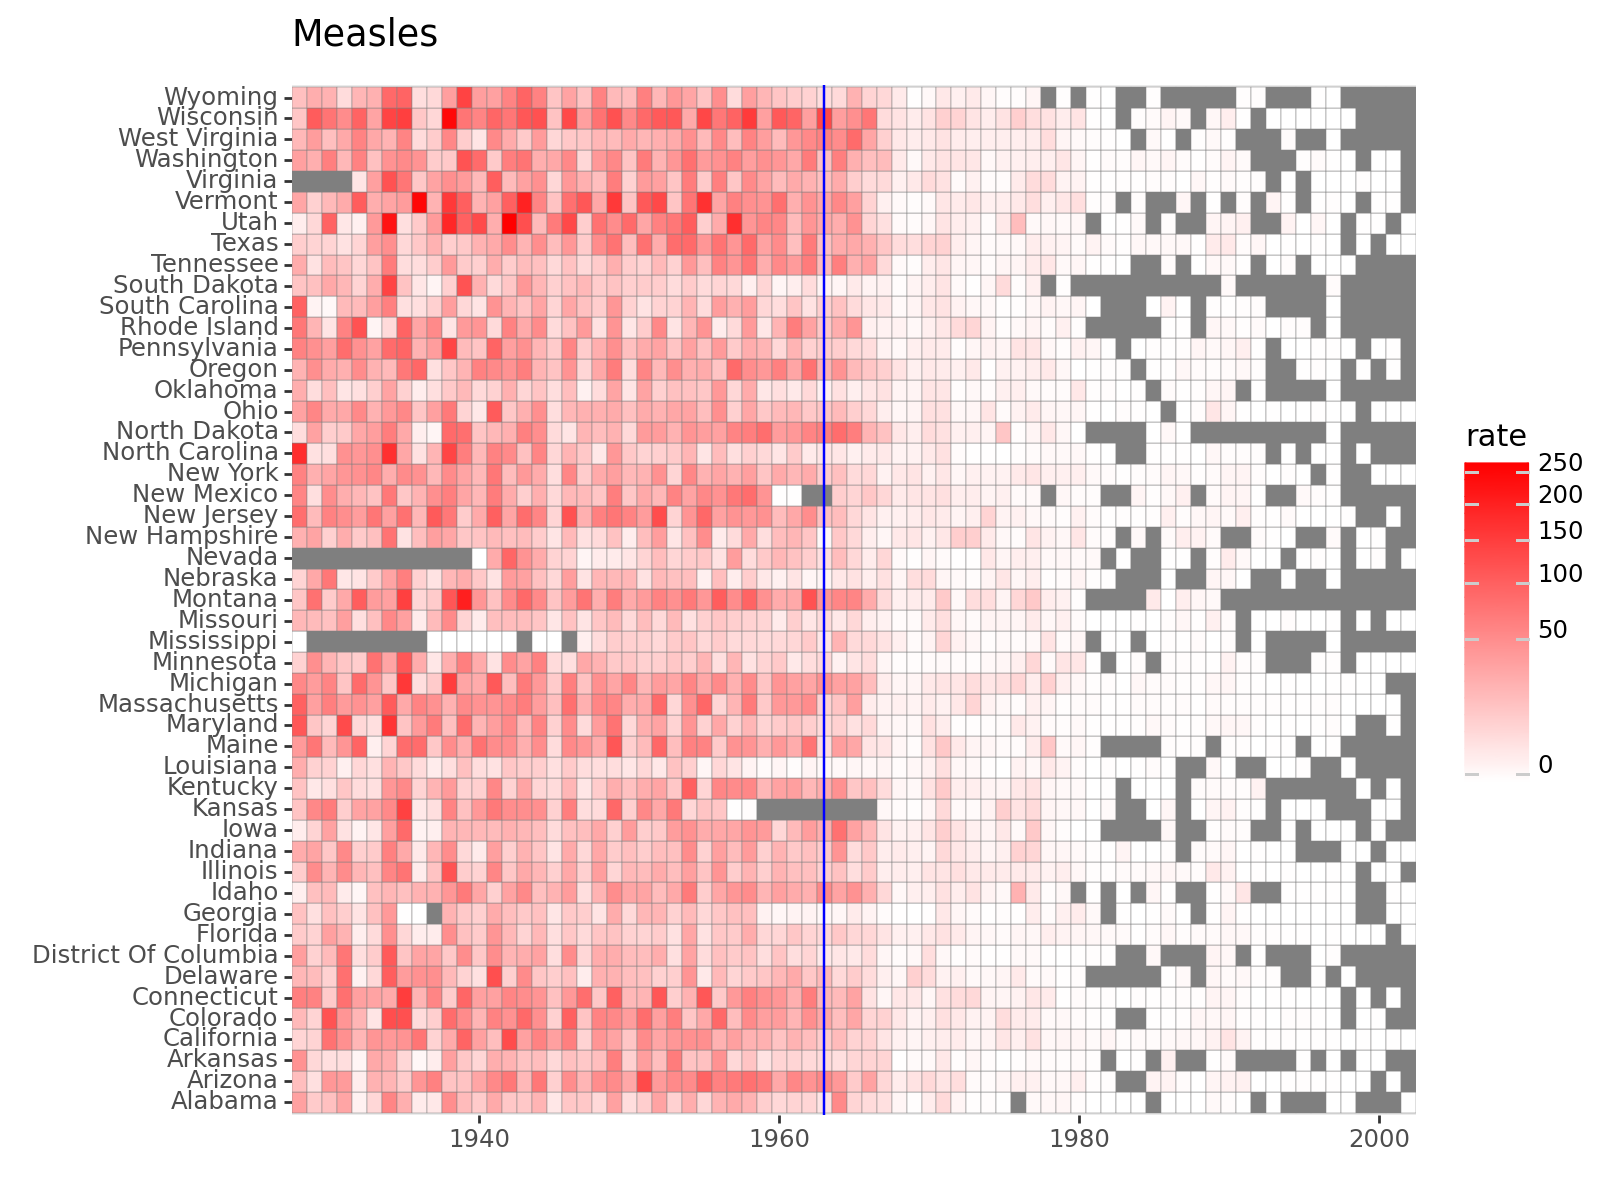

In [ ]:
# Check the plot below.

In [ ]:
# Set 'rate' to NA if weeks_reporting == 0


# copy your answer from 2b-c and put it below
g_heatmap = ...

g_heatmap

- We see that there are more missing reports in 2000s. This is because they stop recording it since measles is now gone.

<br>

---

## Multiple lines in one plot

- Heatmap makes it quite clear about the contribution of vaccines. For showing the trend, it is actually a decent plot.
- However, as we discussed in class, gradient is not a good way to show the quantity as it's hard (or impossible) to accurately read the actual rate.
- In this section, we will explore another type of graph by plotting all the states as lines similar to Q1d-e but in one plot.

### Q3a: Line plot
- Create a line plot where x-axis is `year`, y-axis is `rate`, and group is `state`.
- For the line, set the color to `grey`, alpha to `0.2` and size to `1`.
- Add `scale_y_continuous(trans = "sqrt", breaks = [5, 25, 125, 275])` to create a transformed y-axis.
- Add a `geom_vline` at 1963.
- Finally, add a title 'Measles cases per 10,000 by state'

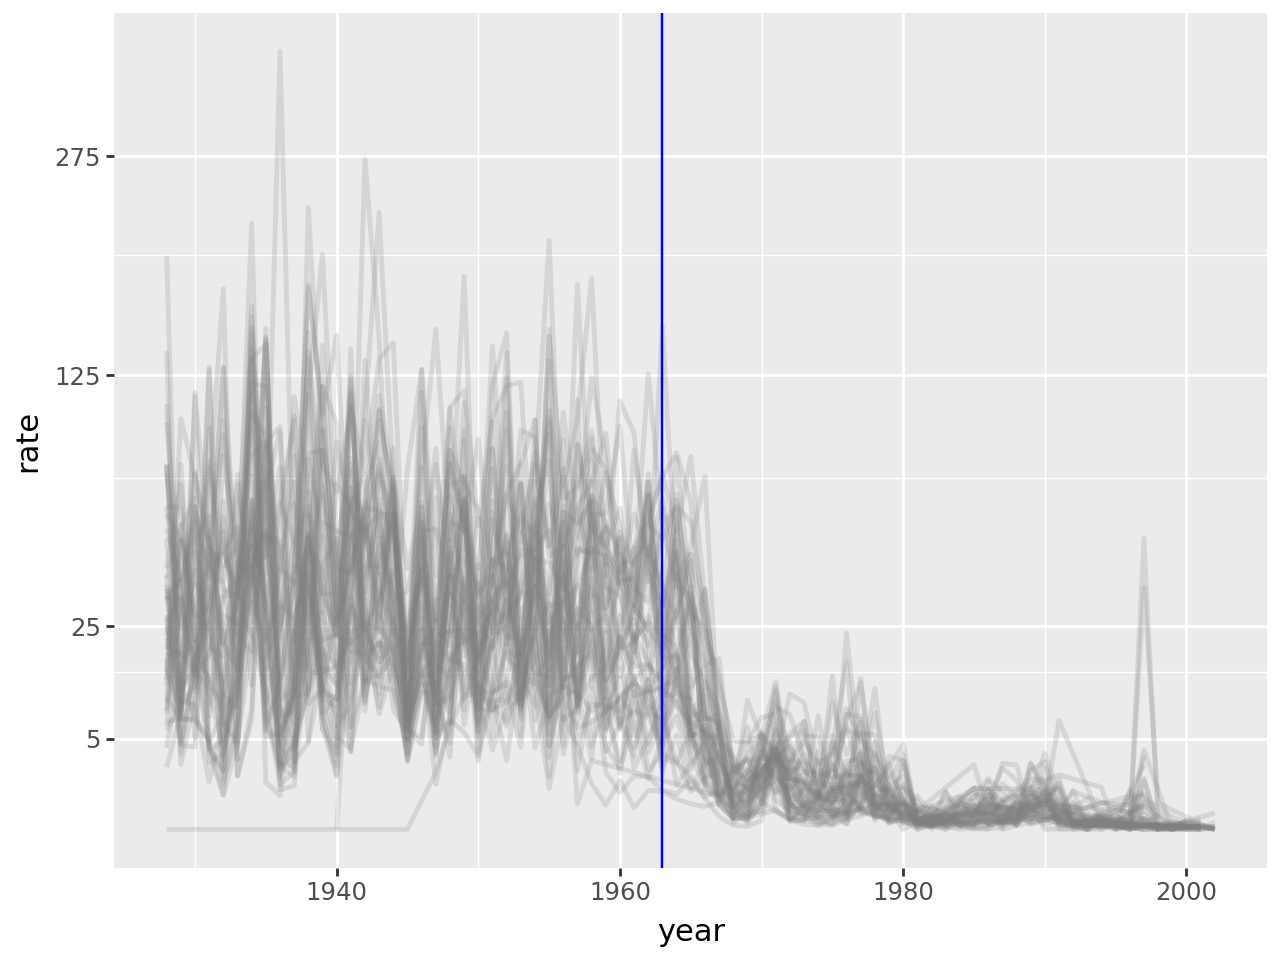

In [ ]:
# See the plot below

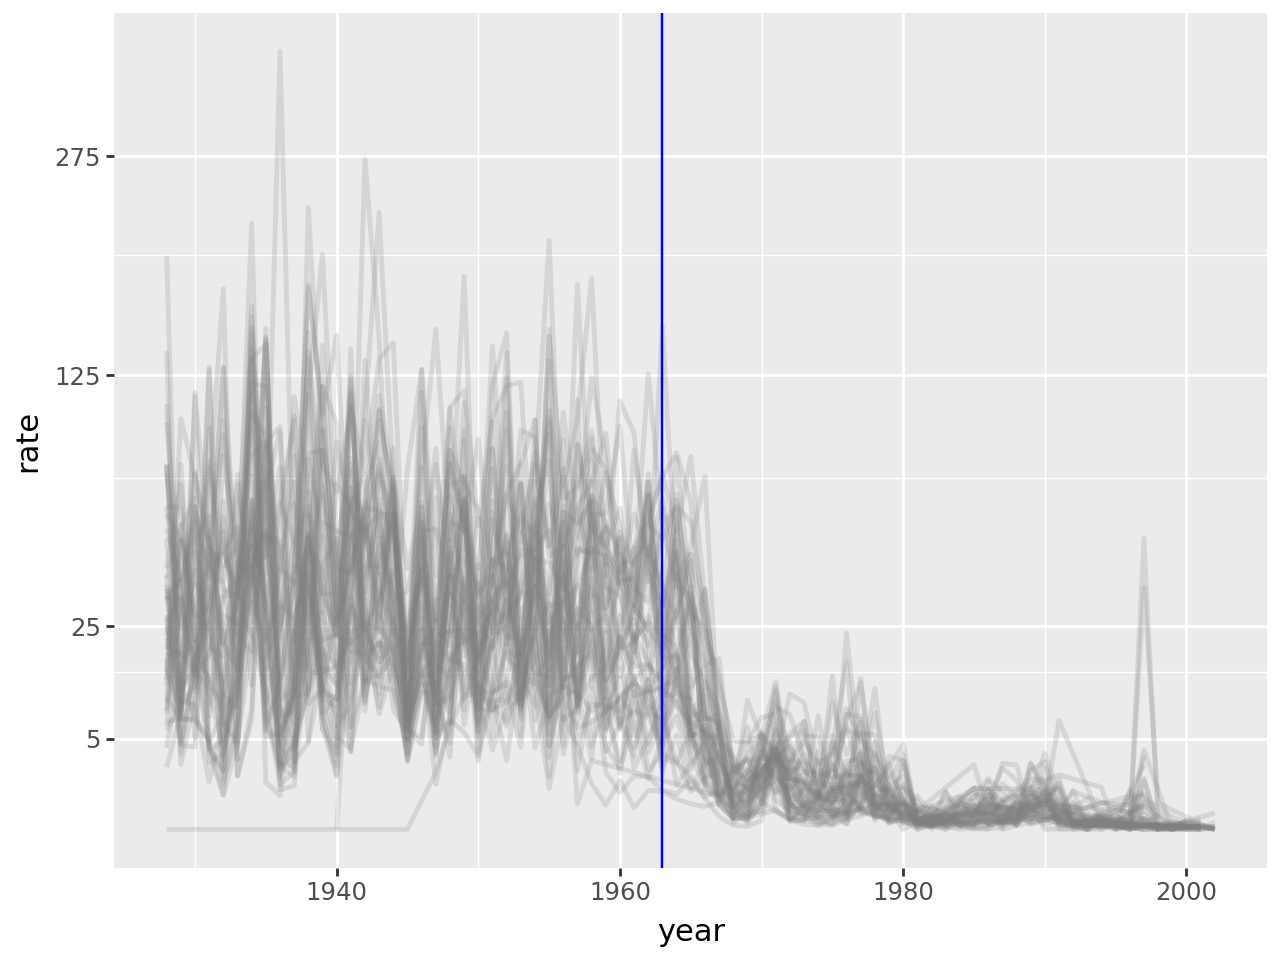

In [ ]:
# remove missing values from the previous section
df_measles_filtered = df_measles.dropna()
g_lines = ...

g_lines

### Mean Rate

- The previous graph can be improved in various ways.
- We will do two improvements in this homework.
- The first improvement is to plot the mean rate across all states. This will show how the average changes over time.
- To do this, we will add a line in the previous plot to show the mean.

### Q3b: Calculate mean rate
- In order to plot a mean line, we will need a new DataFrame for the mean line.
- The DataFrame contains two columns: `year` and `rate` where `rate` is the mean rate across all states.
- For this question, use `groupby` to create this new dataset.
- Don't forget to `reset_index()` to get the column `year` back.

In [ ]:
mean_rate = ...
mean_rate

### Q3c: Adding a mean line
- Add the mean line to the plot in Q3a.
- This line should use the `mean_rate` DataFrame from Q3b as a dataset and has its own `aes()` Make this line with `size = 1`.
- **Importance**: You will need to redo the whole plot. The new plot should have two `geom_line` - one with `df_measles_filtered` as a data and a new mean line with `mean_rate` as a data. (`ggplot()` should not contain any data now.)
- Effectively, we create two layers with their own data but shared names.
- Everything else remains the same.

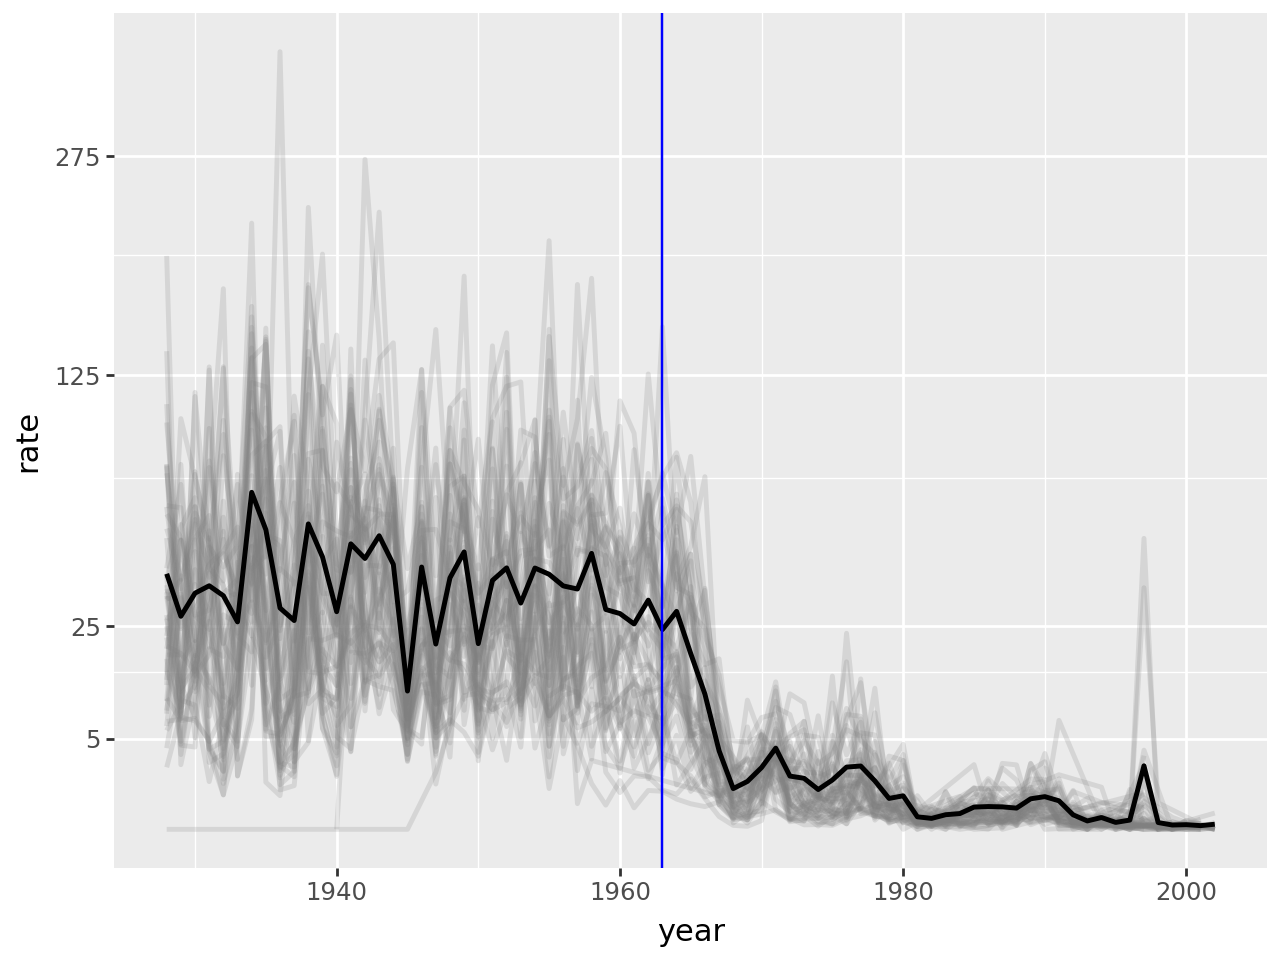

In [ ]:
# Check the plot below

In [ ]:
g_lines = ...

g_lines

### Q3d: Adding a label

- Now that we have a mean line, we want to add a label to indicate it too.
- Add `geom_label` into the previous graph that says 'US Average'.
- `geom_label` is similar to `geom_text` but with a background. ([Documentation](https://plotnine.org/reference/geom_label.html))
- You have two ways to do this:
  - Create a new DataFrame and pass it in `geom_label` (see the slide).
  - Alternatively, you can simply call it withput a dataset like this `geom_label(aes(x = ..., y=...), label ='US_Average')`
- Try to position it nicely.


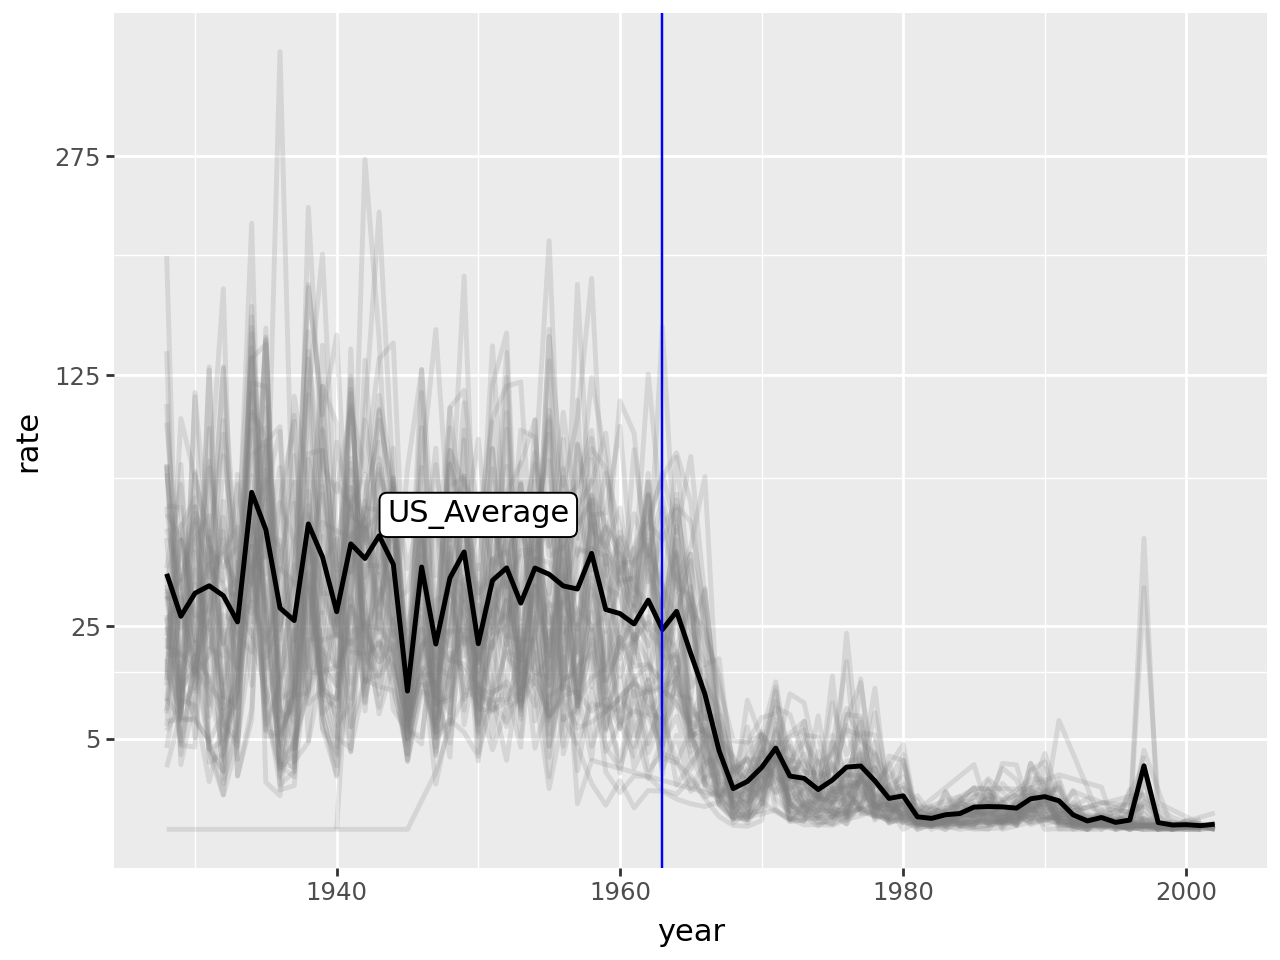

In [ ]:
# Check the plot below.

In [ ]:
g_lines = ...

g_lines

### Q3e-f: Showing a few states
- One way to make this graph better is to show one or two chosen states.
- Add two lines to highlight two states with labels and different colors.
- You can choose the two states.


<br>

---

## Diamond Dataset

- For the rest of this homework, we will continue exploring `diamond` dataset from the lecture.
- The main question that we want to answer is the relationship between price and other features.
- Here is the [documentation](https://plotnine.org/reference/diamonds.html) for this dataset.

In [ ]:
from plotnine.data import diamonds
diamonds.head()

In [ ]:
diamonds.shape

- During the lecture, we explored a few relationships of diamond's variables.
- We looked at the relationship between `price` and `carat` (the weight of diamond).

In [ ]:
smaller = diamonds[diamonds['carat'] < 3] # we limit our exploration to only small diamonds
g_price_carat = ggplot(smaller, aes('price','carat')) + geom_point()
g_price_carat

- We see that as carat increases, the price also increases.
- Next, we look at the relationship between `price` and `cut` (quality)

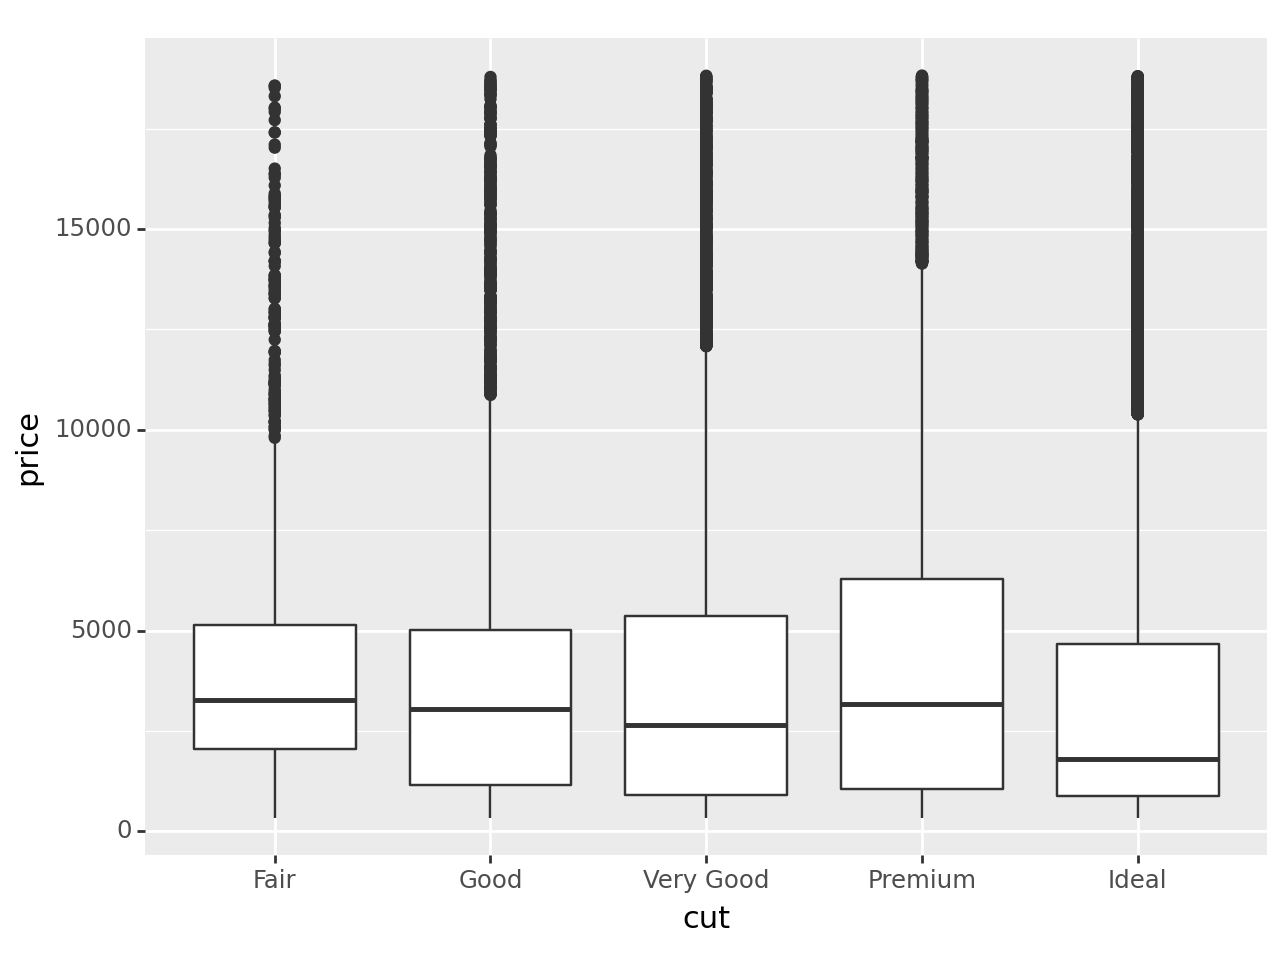

In [ ]:
g_price_cut = ggplot(smaller, aes(y='price', x='cut')) + geom_boxplot()
g_price_cut

- Looking at this plot, we were puzzled why the medain of fair diamonds is hidher than ideal diamonds.
- We will explore this further in this homework.

- Before we drive deeper, let's step back and check other features in the dataset.

| Column |	Description |
| -----  | --------------|
| price	 | price in US dollars ($326-$18,823) |
| carat	 | weight of the diamond (0.2-5.01) |
| cut	   | quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color	 | diamond colour, from J (worst) to D (best) |
| clarity |	a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)) |
| x      |	length in mm (0-10.74) |
| y      | 	width in mm (0-58.9) |
| z      |	depth in mm (0-31.8) |
| depth  |	total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)|
| table	 | width of top of diamond relative to widest point (43-95) |

- Looking at these variables carefully, you may notice two types of variables besides price: those about quality and those about size/weight of diamonds.

- So you may question whether or not those variables in the same type are related to each other or not. If so, maybe we do not need to check all of them but just one of them.

### Q4a-c: `carat` and `x`, `y`, `z`

- Let's check out the relationships between `carat` and `x`, `y`, and `z`.
- Create three plots that show the three relationships


In [ ]:
# carat and x


In [ ]:
# carat and y


In [ ]:
# carat and z


- You should see that `carat` and `x`, `y`, and `z` are closely related.
- There are some outliers but there are not many and will simply ignore them for this homework. These outliers can distost the plots so the relationship may not be as clear.
- This makes sense since the size of diamond should related to its weight.

### The relationship between `cut` and `color` and `clarity`
- We want to do the same for `cut` and `color` and `clarity`.
- All three are *ordered categorical variables* so it can be quite hard to see their relationships.
- What we will do here instead is to convert orderd categorical variables to numerical variables by mapping each categorical to a number.
- For instance, `cut` consists of 5 categories from `fair` to `ideal`. We can map `fair` to 1 and `ideal` to 5.
- When we are doing this type of conversion, we assume that going from one group to the next group is the same for all groups (i.e., from `Fair` to `Good` is the same as `Good` to `Very Good`).


### Q5a - Convert `color` and `clarity` to numerical
- Convert `color` and `clarity` to numerical variables.
- Specifically, we will create two new columns, `color_num` and `clarity_num` that map the lowest color/clarity to 0 and highest color/clarity to the number of color/clarity - 1.
- We can easily do this using `.cat.codes` (see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html))

In [ ]:
smaller.loc[:,'color_num'] = smaller['color'].cat.codes
smaller.loc[:,'clarity_num'] = ... # Fill in your answer here
# We can check that they are the same (See the table for ranking)
print(smaller['clarity'].value_counts())
print(smaller['clarity_num'].value_counts())

### Q5b - Ploting `cut` vs. `color_num` and `clarity_num`
- We can now plot the relationship between `cut` and `color_num` and `clarity_num`.
- We will use `box_plot()` for this question.

In [ ]:
# `cut` and `color_num`
...

In [ ]:
# `cut` and `clarity_num`
...

- We see that there is no clear relationship between `color` and `cut`.
- For `clarity` and `cut`, we should see that `fair` has lower clarity thatn `ideal`.
- For this homework, we will simply focus on `cut` but this means we may want to further explore `color` together with `cut` too.

<br>

---

### `Price` and `Cut`

- We will now take a closer look at the relationship between `price` and `cut` by breaking it down by `carat`.
- Recall that, when looking at `price` and `cut` only, fair diamonds has higher median price than ideal diamonds. We will try to tease this apart.

### Q6a - Scatter plot

- Let's start by creating a scatter plot where x is `price`, y is `carat` and color is `cut`.

In [ ]:
g_p_carat_cut = ...
print(g_p_carat_cut)

### Q6b - Only `Fair` vs. `Ideal`
- The previous graph is just too hard to understand. There are simply too many points.
- We will instead only focus on `Fair` and `Ideal`.
- Additionally, we will reduce the size of points to `0.2`.
- Complete the code below to create a new dataframe with only `Fair` and `Ideal` and replot the graph from Q6a.

In [ ]:
smaller_FI = ... # Fill in your code here

smaller_FI.loc[:,'cut'] = smaller_FI['cut'].cat.remove_unused_categories()  # remove unused categories.
g_p_carat_cut = ... # from Q6a
g_p_carat_cut

- From this plot, it seems like fair diamonds actually have lower price than ideal diamonds when we look at specific `carat`.
- However, this plot is hard to compare between `fair` and `ideal` across different `carat`. What we want is boxplot.
- But boxplot would require `carat` to be a categorical veriable.

### Q7a - Converting numerical to categorical
- One way to convert a numerical variable to a categorical variable is to do something similar to histogram - binning a range of values into the same bin.
- It's like when you can bin points into different grades (e.g., 80 - 100 is A, 70-79 is B, etc).
- We will do the same thing here. We will assign each range from 1 to n in order.
- Specfically, we will divide the range between 0 - 3 carats into 10 bins equally.
- So, [0, 0.3) is 1, [0.3,0.6) is 2, ... [2.7,3.0) is 10.
- There are several ways to do this. You may find `pandas.cut` useful [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) but you do not need to use it.
- Make sure there are ten bins on x-axis like the graph below.

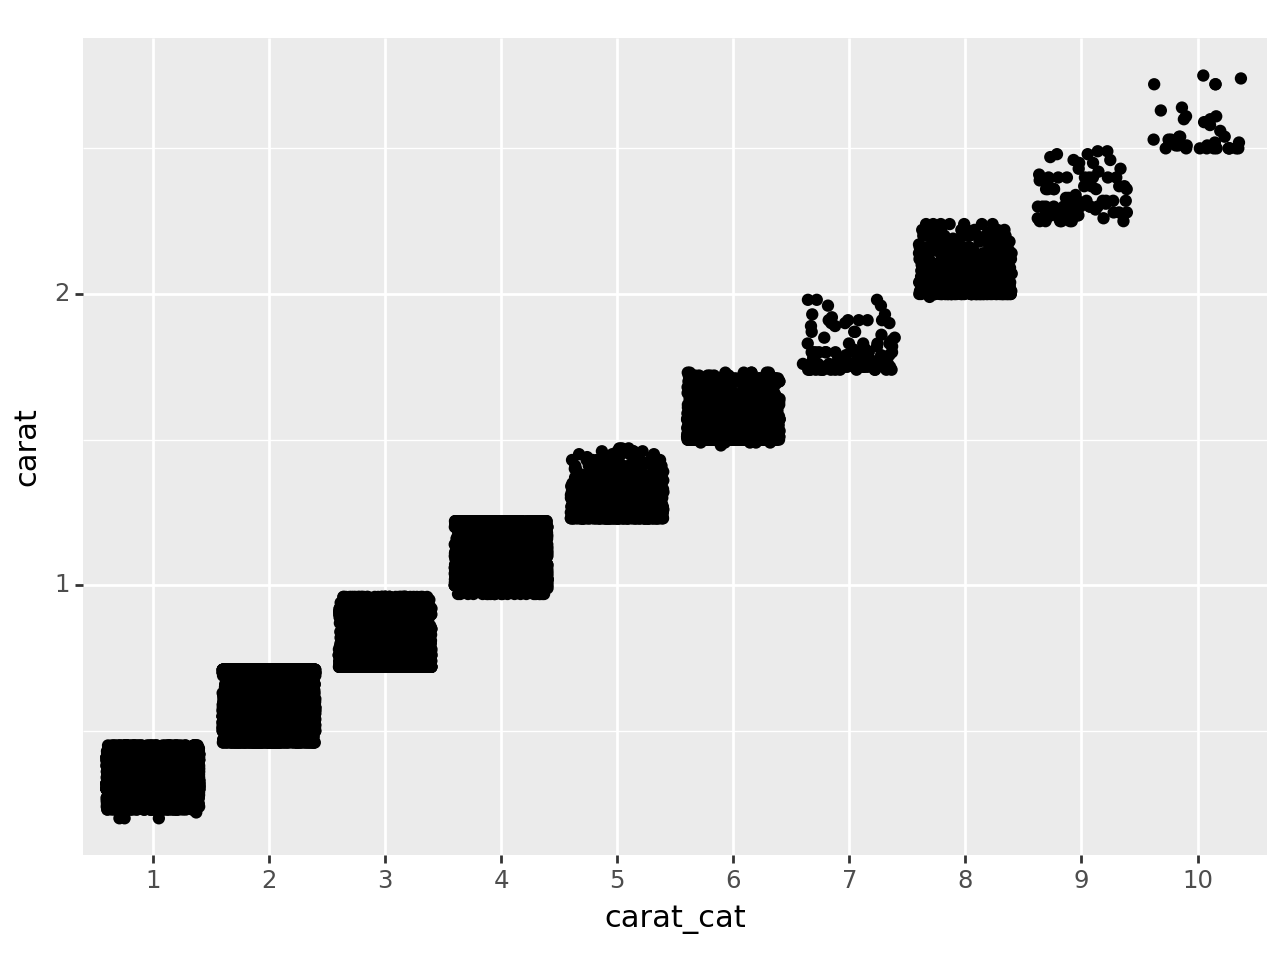

<Figure Size: (640 x 480)>

In [ ]:
# Click to see the graph

In [ ]:
smaller_FI.loc[:,'carat_cat'] = ...
# Check that you do it correctly
ggplot(smaller_FI, aes(x='carat_cat',y='carat')) + geom_jitter(height=0)

### Q7b - Boxplot of `price`, `cut`, and `carat_cat`
- Finally, plot a boxplot where x is `carat_cat`, y is `price`, and fill is `cut`
- Do some additional steps to make your graph easy to read. You may find `scale_fill_manual` useful. ([documentation](https://plotnine.org/reference/scale_fill_manual.html))

In [ ]:
g_p_cut_carat = ...
g_p_cut_carat

- You should see that medain price of ideal diamonds are higher or about the same as fair diamonds across all carat categories.

# Submission
- File -> Download -> Download .ipynb
- Upload to MS Teams